<a href="https://colab.research.google.com/github/mushfiqur11/NumericalAnalysisMethods/blob/master/160041011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Name : Md. Mushfiqur Rahman

#### ID : 160041011
#### Group : Y

##### Imports

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math


For comparing between the Runge Kutta 2nd order method and Runge Kutta 4th order method, I'll be using the problem given in the pdf. 

## Problem :

$$ f = e^{-2x} - 2y $$

$y_{0} = 1 $, $ x_0 = 0$ and $ x = 1$

In [0]:
def function(x,y):
  return math.exp(-2 * x) - 2 * y


#### Runge Kutta 2nd Order

In [0]:
def rungeKutta2(x0,y0,x,h):
    n = int((x-x0)/h)  
    y=y0
    for i in range(0,n):
        k1 =  function(x0, y)
        k2 =  function(x0+h ,y+k1*h)
        y=y+.5*(k1+k2)*h
        x0=x0+h
        return y

#### Runge Kutta 4th Order

In [0]:
def rungeKutta4(x0,y0,x,h):
    n = int((x-x0)/h)  
    y=y0
    for i in range(0,n):
        k1 = h * function(x0,y)
        k2 = h * function(x0+0.5*h,y+k1*0.5)
        k3 = h * function(x0+0.5*h,y+k2*0.5)
        k4 = h * function(x0 + h, y + k3) 
        y = y + (1.0/6.0)*(k1+2*k2+2*k3+k4)
        x0 = x0 + h
        return y

In [0]:
def calcError(a,b):
  
  return abs((a-b)/a)*100

####Initialization

In [0]:
hVals=[0.8,0.7,0.6,0.5,0.4,0.3,0.2]
x = 1
x0 = 0
y0 = 1

#### Runge Kutta 2nd Order call
  I have used the Heun's method

In [56]:
result2=[]

for i in range(len(hVals)):
  result = rungeKutta2(x0,y0,x,hVals[i])
  print ("For h = "+str(hVals[i])+" y= " + str(result))
  result2.append(result)

For h = 0.8 y= 0.5207586071978623
For h = 0.7 y= 0.5263089373795622
For h = 0.6 y= 0.5503582635736606
For h = 0.5 y= 0.5919698602928606
For h = 0.4 y= 0.6498657928234444
For h = 0.3 y= 0.722321745414104
For h = 0.2 y= 0.807032004603564


#### RungeKutta 4th order call

In [57]:
result4=[]

for i in range(len(hVals)):
  result = rungeKutta4(x0,y0,x,hVals[i])
  print ("For h = "+ str(hVals[i])+" y=" + str(result))
  result4.append(result)

For h = 0.8 y=0.37606676844779696
For h = 0.7 y=0.4254345080574693
For h = 0.6 y=0.4846437207650345
For h = 0.5 y=0.5528505075377522
For h = 0.4 y=0.629373299288944
For h = 0.3 y=0.7135224966862773
For h = 0.2 y=0.8043918972043806


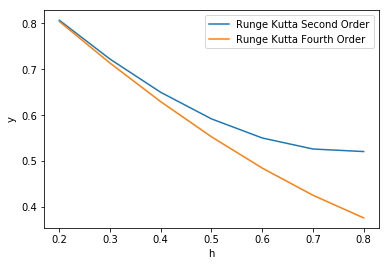

In [58]:
plt.plot(hVals, result2,label = "Runge Kutta Second Order")
plt.plot(hVals, result4,label = "Runge Kutta Fourth Order")
plt.xlabel('h')
plt.ylabel('y')
plt.legend()
plt.show()

#### Error Calculation

In [0]:
def ARE(result):
  absRelErr = []
  for i in range(0,len(result)-1):
  
    err = calcError(result[i],result[i+1])
    absRelErr.append(err)
  return absRelErr

6
6


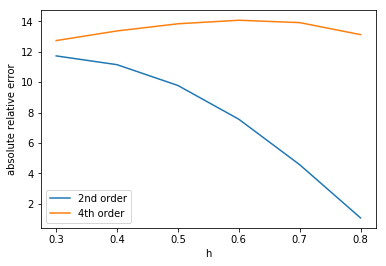

In [67]:
Err2 = ARE(result2)
print(np.shape(Err2)[0])
Err4 = ARE(result4)
print(np.shape(Err4)[0])

plt.figure()
plt.plot(hVals[0:np.shape(Err2)[0]], Err2, label = '2nd order')
plt.plot(hVals[0:np.shape(Err2)[0]], Err4, label = '4th order')
plt.xlabel('h')
plt.ylabel('absolute relative error')
plt.legend()
plt.show()

#### Observation
We can clearly see from the figures that lower value of h gives better approximation and lower error. Also Runge Kutta 4th order equation has less error than Runge Kutta 2nd order. But we also need to keep in mind that the time complexity is higher in 4th order Runge Kutta.